In [10]:
import numpy as np
import pandas as pd
import xlrd

import matplotlib.pyplot as plt
from numpy.fft import fft, fftfreq, ifft, rfft

def fft_from_data_frame(data_frame):
    fs = 114 * 1000 #114KHZ
    signal_set = []
    for row in data_frame.values:
        fft_data = fft(row, n=row.size)/row.size
        freq = fftfreq(row.size, d=1/fs)
        cut_high_signal = np.abs(fft_data).copy()
        cut_high_signal[(freq > 50000)] = 0
        cut_high_signal[(freq < 30000)] = 0
        signal_without_0 = list(filter(lambda a: a != 0, cut_high_signal))
        signal_set.append(np.abs(signal_without_0))
    return signal_set

def custom_normalization(X_set):
    new_X_set = []
    for X in X_set:
        min = np.min(X)
        max = np.max(X)
        value = max - min
        data_set = []
        for data in X:
           data_set.append(((data - min) / value) + 0)
        new_X_set.append(data_set)
    return new_X_set

import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt  

def plot_confusionMatrix(result, y_test, labels = ['CAR', 'MOTORBIKE', 'CYCLE', 'HUMAN', 'PILLAR', 'STOPPER', 'WALL']):
    cm = confusion_matrix(result, y_test)
    print(cm)
    recall_set = []
    cm_overall = []
    F1_SCORE_Overall = 0
    for index, value in enumerate(labels):
#         print(index, labels[index])
        precision = round(precision_score(y_test, result, average='micro',labels=labels[index]),2)
        recall = round(recall_score(y_test, result, average='micro',labels=labels[index]),2)
        F1_SCORE = round(f1_score(y_test, result, average='micro',labels=labels[index]),2)
        print(value,"_F1-score:", F1_SCORE)
        
        recall_set.append(recall)
        cm_overall.append(np.append(cm[index], precision))
        
    score = accuracy_score(result, y_test)
    cm_overall.append(np.append(recall_set, score))
#     print(recall_set, cm_overall) 
    sum = np.sum(cm, axis=1)
    cm = cm_overall   
    
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(cm, annot=True, ax = ax,linewidths=.5,fmt='g',cmap="Greens"); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    counter = 0
    for i in range(0,3):
        for j in range(0,4):
            percentage = cm[i][j]/sum[i]
            t = ax.texts[counter]
            if j == 3 :
                t.set_text(str(cm[i][j]))
            else:
                t.set_text(str(cm[i][j]) + '\n' + str(round(percentage*100,2)) + " %")
            counter = counter + 1
    ax.xaxis.set_ticklabels(labels); 
    ax.yaxis.set_ticklabels(labels);

def create_confusion_matrix(result, y_test, labels):
    cm = confusion_matrix(result, y_test)
    import seaborn as sns
    import matplotlib.pyplot as plt     
    sum = np.sum(cm, axis=1)
    score = accuracy_score(result, y_test)

    from sklearn.metrics import precision_score, recall_score, f1_score
    precision_CLASS_A = round(precision_score(y_test, result, average='binary',pos_label=labels[0]),2)
    precision_CLASS_B = round(precision_score(y_test, result, average='binary',pos_label=labels[1]),2)
    recall_CLASS_A = round(recall_score(y_test, result, average='binary',pos_label=labels[0]),2)
    recall_CLASS_B = round(recall_score(y_test, result, average='binary',pos_label=labels[1]),2)
    f1_CLASS_A = round(f1_score(y_test, result, average='binary',pos_label=labels[0]),2)
    f1_CLASS_B = round(f1_score(y_test, result, average='binary',pos_label=labels[1]),2)
    f1_average = round((f1_CLASS_A + f1_CLASS_B)/2, 2);
    print('Precision: Class A',precision_CLASS_A)
    print('Precision: Class B',precision_CLASS_B)
    print('Recall: Class A',recall_CLASS_A)
    print('Recall: Class B',recall_CLASS_B)
    print('F1-Score: Class A',f1_CLASS_A)
    print('F1-Score: Class B',f1_CLASS_B)
    print('Average F1-score:', f1_average)

    cm_new = np.append(cm[0], precision_CLASS_A)
    cm_new2 = np.append(cm[1], precision_CLASS_B)
    cm_new3 = np.array([recall_CLASS_A, recall_CLASS_B, score])
    cm = np.array([cm_new,cm_new2,cm_new3])


    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(cm, annot=True, ax = ax,linewidths=.5,fmt='g',cmap="Reds"); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    counter = 0
    for i in range(0,2):
        for j in range(0,3):
            percentage = cm[i][j]/sum[i]
            t = ax.texts[counter]
            if j == 2:
                t.set_text(str(cm[i][j]))
            else:
                t.set_text(str(cm[i][j]) + '\n' + str(round(percentage*100,2)) + " %")
            counter = counter + 1

    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels);
        

In [3]:
import glob

def get_fft_set(file_names):
    fft_set = []
    for front in file_names:
        data = pd.read_csv(front)
        fft_data = fft_from_data_frame(data)
        fft_set = fft_data + fft_set
    return fft_set

car_front_1 = glob.glob('../data/Result/67_Ford_Black_front/*_overall.csv')
car_front_2 = glob.glob('../data/Result/99_Fiesta_Purple_front/*_overall.csv')
car_side_1 = glob.glob('../data/Result/99_Fiesta_Purple_side/*_overall.csv')
car_side_2 = glob.glob('../data/Result/129_Skoda_Grey_side/*_overall.csv')
car_back_1 = glob.glob('../data/Result/26_Ford_Black_back/*_overall.csv')
car_back_2 = glob.glob('../data/Result/66_Ford_Purple_back/*_overall.csv')
motorbike_1 = glob.glob('../data/Result/92_CBF_Honda_side1/*_overall.csv')
motorbike_2 = glob.glob('../data/Result/92_CBF_Honda_side2/*_overall.csv')
cycle_1 = glob.glob('../data/Result/Cycle_side/*_overall.csv')
human_A = glob.glob('../data/Result/Human_A/*_overall.csv')
human_B = glob.glob('../data/Result/Human_B/*_overall.csv')
human_C = glob.glob('../data/Result/Human_C/*_overall.csv')
human_D = glob.glob('../data/Result/Human_D/*_overall.csv')
human_E = glob.glob('../data/Result/Human_E/*_overall.csv')
pillar_1 = glob.glob('../data/Result/Pillar_1/*_overall.csv')
pillar_2 = glob.glob('../data/Result/Pillar_2/*_overall.csv')
pillar_3 = glob.glob('../data/Result/Pillar_3/*_overall.csv')
stopper_1 = glob.glob('../data/Result/Stopper_1/*_overall.csv')
stopper_2 = glob.glob('../data/Result/Stopper_2/*_overall.csv')
ventilator_1 = glob.glob('../data/Result/Ventilator_1/*_overall.csv')
wall_1 = glob.glob('../data/Result/Wall_1/*_overall.csv')
wall_2 = glob.glob('../data/Result/Wall_2/*_overall.csv')
wall_3 = glob.glob('../data/Result/Wall_3/*_overall.csv')

car_front_1_fft = get_fft_set(car_front_1)
car_front_2_fft = get_fft_set(car_front_2)
car_side_1_fft = get_fft_set(car_side_1)
car_side_2_fft = get_fft_set(car_side_2)
car_back_1_fft = get_fft_set(car_back_1)
car_back_2_fft = get_fft_set(car_back_2)
motorbike_1_fft = get_fft_set(motorbike_1)
motorbike_2_fft = get_fft_set(motorbike_2)
cycle_1_fft = get_fft_set(cycle_1)
human_A_fft = get_fft_set(human_A)
human_B_fft = get_fft_set(human_B)
human_C_fft = get_fft_set(human_C)
human_D_fft = get_fft_set(human_D)
human_E_fft = get_fft_set(human_E)
pillar_1_fft = get_fft_set(pillar_1)
pillar_2_fft = get_fft_set(pillar_2)
pillar_3_fft = get_fft_set(pillar_3)
stopper_1_fft = get_fft_set(stopper_1)
stopper_2_fft = get_fft_set(stopper_2)
ventilator_1_fft= get_fft_set(ventilator_1)
wall_1_fft = get_fft_set(wall_1)
wall_2_fft = get_fft_set(wall_2)
wall_3_fft = get_fft_set(wall_3)

In [4]:
car = car_front_1_fft + car_front_2_fft + car_side_1_fft + car_side_2_fft + car_back_1_fft + car_back_2_fft
motorbike = motorbike_1_fft + motorbike_2_fft
cycle = cycle_1_fft
vehicle = cycle + car + motorbike
human = human_A_fft + human_B_fft + human_C_fft + human_D_fft + human_E_fft
pillar = pillar_1_fft + pillar_2_fft + pillar_2_fft
stopper = stopper_1_fft + stopper_2_fft
# ventilator = ventilator_1_fft
wall = wall_1_fft + wall_2_fft + wall_3_fft
objects = pillar + wall + stopper

In [5]:
X = vehicle + objects + human
y = len(vehicle)*['Vehicle'] + len(objects)*['Objects'] + len(human)*['Human']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

normalized_X_train = custom_normalization(X_train)
normalized_X_test = custom_normalization(X_test)

Accuracy: 0.8266850068775791
[[ 278   48   31]
 [ 191 6092 1109]
 [ 206  683 4448]]
Vehicle _F1-score: 0.83
Objects _F1-score: 0.83
Human _F1-score: 0.83


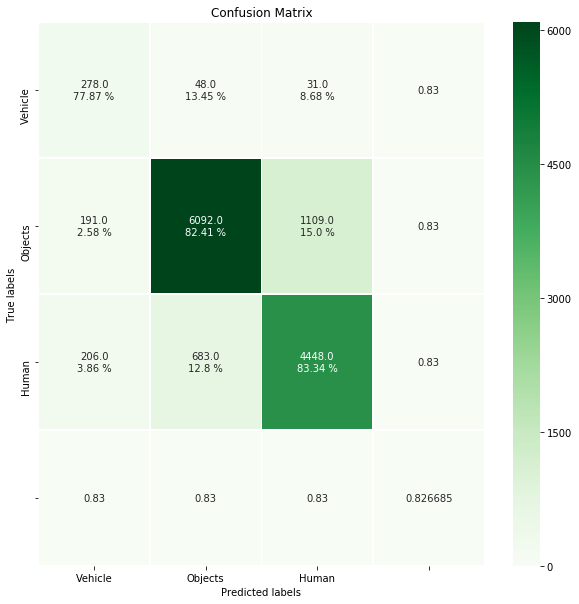

In [11]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(38,32), random_state=12,activation="relu")
clf.fit(normalized_X_train, y_train)
result = clf.predict(normalized_X_test)

# print(confusion_matrix(result, y_test))
print("Accuracy:", accuracy_score(result, y_test))
plot_confusionMatrix(result, y_test, ['Vehicle', 'Objects', 'Human'])

Accuracy: 0.9460492128992817
[[ 237    9   43]
 [ 150 6755  157]
 [ 288   59 5388]]
Vehicle _F1-score: 0.95
Objects _F1-score: 0.95
Human _F1-score: 0.95


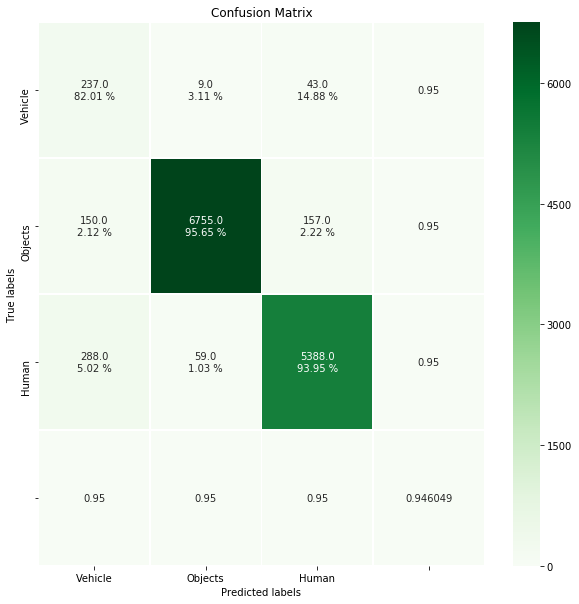

In [12]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_jobs=2, random_state=0, n_estimators=100)
clf.fit(normalized_X_train, y_train)
result = clf.predict(normalized_X_test)

# print(confusion_matrix(result, y_test))
print("Accuracy:", accuracy_score(result, y_test))
plot_confusionMatrix(result, y_test, ['Vehicle', 'Objects', 'Human'])